In [ ]:
# _target_: albumentations.Compose
# keypoint_params:
#   _target_: albumentations.KeypointParams
#   format: "xy"
#   remove_invisible: false
# transforms:

In [5]:
import albumentations as A
from albumentations import Compose
from albumentations.pytorch.transforms import ToTensorV2
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os

In [13]:
transform = A.Compose([
    # - _target_: albumentations.ShiftScaleRotate
    #   shift_limit: 0.05
    #   scale_limit: 0.05
    #   rotate_limit: 15
    #   p: 0.5
    A.ShiftScaleRotate(shift_limit=0.05 ,scale_limit=0.05, rotate_limit=15, p=0.5),
    # - _target_: albumentations.Resize
    #   height: 256
    #   width: 256
    #   always_apply: true
    A.Resize(height=256, width=256, always_apply=True),
    # - _target_: albumentations.RandomCrop
    #   height: 224
    #   width: 224
    #   always_apply: true
    A.RandomCrop(height=224, width=224, always_apply=True),
    # - _target_: albumentations.RGBShift
    #   r_shift_limit: 15
    #   g_shift_limit: 15
    #   b_shift_limit: 15
    #   p: 0.5
    A.RGBShift(r_shift_limit=15, g_shift_limit=15, b_shift_limit=15, p=0.5),
    # - _target_: albumentations.RandomBrightnessContrast
    #   p: 0.5
    A.RandomBrightnessContrast(p=0.5),
    # - _target_: albumentations.Normalize
    #   mean: [0.485, 0.456, 0.406]
    #   std: [0.229, 0.224, 0.225]
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    # - _target_: albumentations.pytorch.transforms.ToTensorV2
    ToTensorV2()
    ],
    #   _target_: albumentations.KeypointParams
    #   format: "xy"
    #   remove_invisible: false
    keypoint_params=A.KeypointParams(format="xy", remove_invisible=False)  
)

In [29]:
image = Image.open("..\\data\\ibug_300W_large_face_landmark_dataset\\ibug\\image_003_1.jpg")

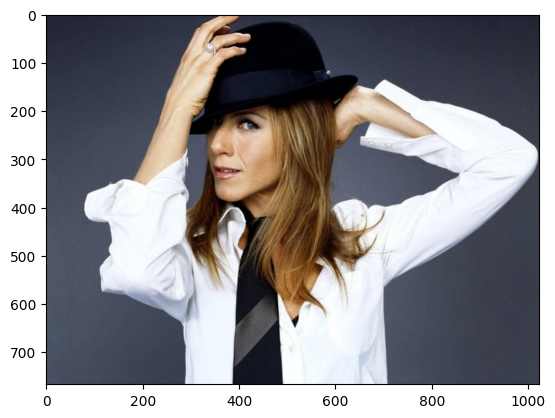

In [30]:
plt.imshow(image)

In [31]:
image = np.array(image)

In [32]:
transform_image = transform(image=image)
image = transform_image["image"]

In [36]:
from utils import plot_examples
plt.imshow(image)

ImportError: cannot import name 'plot_examples' from 'utils' (c:\Users\Admin\anaconda3\envs\myenv\lib\site-packages\utils\__init__.py)

In [1]:
!pip install scipy matplotlib


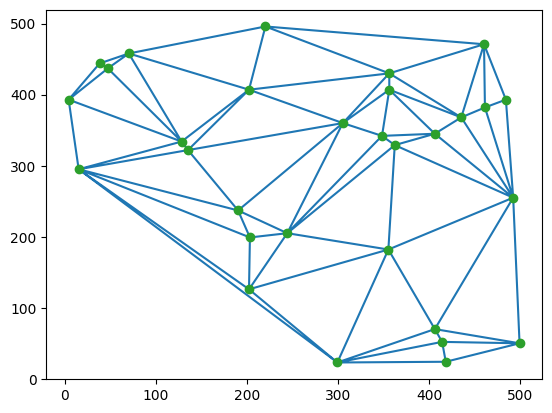

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay

width, height = 500, 500

# Tạo một tập hợp các điểm ngẫu nhiên
points = np.random.randint(0, high=min(width, height), size=(30, 2)).astype(float)

# Thực hiện Delaunay Triangulation
tri = Delaunay(points)

# Vẽ kết quả
plt.triplot(points[:, 0], points[:, 1], tri.simplices)
plt.plot(points[:, 0], points[:, 1], 'o')
plt.show()

In [10]:
import cv2
import numpy as np

# Kích thước của hình ảnh


# Tạo một cửa sổ hình ảnh
img = np.zeros((height, width, 3), dtype=np.uint8)

# # Tạo một tập hợp các điểm ngẫu nhiên (lưu ý việc chuyển kiểu dữ liệu thành float)


# Tạo một vùng hình chữ nhật
rect = (0, 0, width, height)

# Khởi tạo Delaunay Subdiv2D với vùng hình chữ nhật
subdiv = cv2.Subdiv2D(rect)

# Thêm các điểm vào subdiv (chuyển mỗi điểm thành tuple)
for point in points:
    subdiv.insert((point[0], point[1]))

# Lấy các tam giác Delaunay
triangle_list = subdiv.getTriangleList()

# Vẽ các tam giác Delaunay
for t in triangle_list:
    pt1 = (int(t[0]), int(t[1]))
    pt2 = (int(t[2]), int(t[3]))
    pt3 = (int(t[4]), int(t[5]))

    # Vẽ các cạnh tam giác
    cv2.line(img, pt1, pt2, (255, 255, 255), 1)
    cv2.line(img, pt2, pt3, (255, 255, 255), 1)
    cv2.line(img, pt3, pt1, (255, 255, 255), 1)

# Lật hình ảnh theo chiều dọc
img = cv2.flip(img, 0)

# Hiển thị kết quả
cv2.imshow("Delaunay Triangulation", img)
cv2.waitKey(0)
cv2.destroyAllWindows()


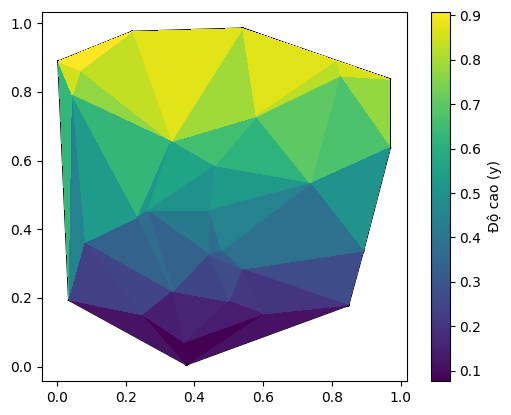

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay

# Tạo một tập hợp các điểm ngẫu nhiên
points = np.random.rand(30, 2)

# Thực hiện Delaunay Triangulation
tri = Delaunay(points)

# Vẽ tam giác với màu sắc dựa trên độ cao (tọa độ y)
plt.triplot(points[:, 0], points[:, 1], tri.simplices, color='black')

# Tính giá trị tô màu cho mỗi tam giác dựa trên tọa độ y của các đỉnh
# Độ cao có thể được tính dựa trên trung bình tọa độ y của tam giác
triangles = points[tri.simplices]
centroids = triangles.mean(axis=1)  # Tính trung bình tọa độ các đỉnh tam giác
heights = centroids[:, 1]  # Sử dụng giá trị y làm độ cao

# Vẽ tam giác và tô màu
plt.tripcolor(points[:, 0], points[:, 1], tri.simplices, facecolors=heights, cmap='viridis')

# Thêm màu sắc vào thanh colorbar
plt.colorbar(label="Độ cao (y)")

# Hiển thị kết quả
plt.gca().set_aspect('equal')
plt.show()


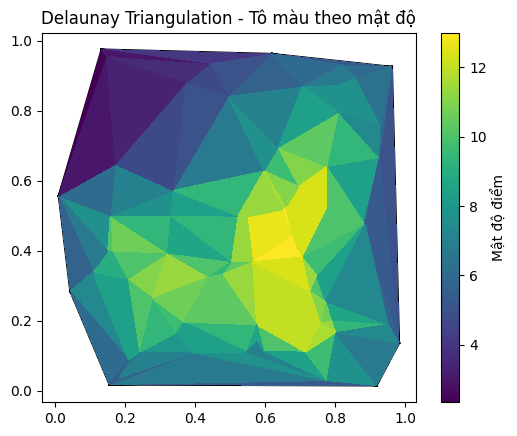

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay, cKDTree

# Tạo một tập hợp các điểm ngẫu nhiên
num_points = 68
points = np.random.rand(num_points, 2)

# Thực hiện Delaunay Triangulation
tri = Delaunay(points)

# Tính toán mật độ điểm bằng cách sử dụng cKDTree
tree = cKDTree(points)

# Mật độ được ước lượng bằng cách đếm số điểm trong bán kính r
r = 0.2  # Bán kính tìm kiếm
density = np.array([len(tree.query_ball_point(point, r)) for point in points])

# Tính độ mật độ cho mỗi tam giác
triangles = points[tri.simplices]
centroids = triangles.mean(axis=1)  # Tính trung bình tọa độ các đỉnh tam giác

# Tính mật độ cho từng tam giác dựa trên các điểm trong tam giác
tri_density = np.zeros(triangles.shape[0])
for i, simplex in enumerate(tri.simplices):
    tri_density[i] = density[simplex].mean()  # Tính mật độ trung bình của các điểm trong tam giác

# Vẽ tam giác và tô màu dựa trên mật độ
plt.triplot(points[:, 0], points[:, 1], tri.simplices, color='black')
plt.tripcolor(points[:, 0], points[:, 1], tri.simplices, facecolors=tri_density, cmap='viridis')

# Thêm màu sắc vào thanh colorbar
plt.colorbar(label="Mật độ điểm")

# Hiển thị kết quả
plt.gca().set_aspect('equal')
plt.title("Delaunay Triangulation - Tô màu theo mật độ")
plt.show()


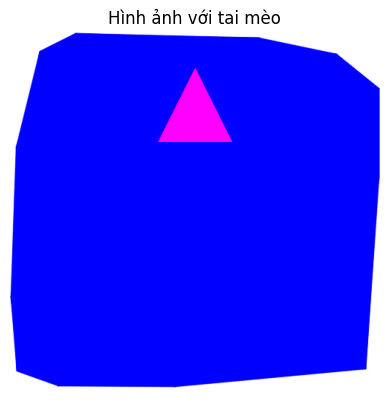

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
import cv2

# Tạo một tập hợp các điểm ngẫu nhiên
num_points = 100
points = np.random.rand(num_points, 2)

# Thực hiện Delaunay Triangulation
tri = Delaunay(points)

# Tạo một hình ảnh trắng
img = np.ones((500, 500, 3), dtype=np.uint8) * 255

# Vẽ tam giác và tô màu
for simplex in tri.simplices:
    triangle = points[simplex] * [500, 500]  # Chuyển đổi tọa độ về hình ảnh
    cv2.fillConvexPoly(img, np.int32(triangle), (0, 0, 255), lineType=cv2.LINE_AA)

# Tạo hình ảnh tai mèo (hoặc tải hình ảnh tai mèo từ tệp)
cat_ear = np.zeros((100, 100, 3), dtype=np.uint8)
cv2.fillPoly(cat_ear, [np.array([[50, 0], [100, 100], [0, 100]])], (255, 0, 255))  # Tạo hình tam giác tai mèo

# Vị trí thêm tai mèo
position = (200, 50)  # Tọa độ góc trên bên trái của tai mèo

# Ghép tai mèo vào hình ảnh
y1, y2 = position[1], position[1] + cat_ear.shape[0]
x1, x2 = position[0], position[0] + cat_ear.shape[1]

# Đảm bảo không vượt quá kích thước hình ảnh
y2 = min(y2, img.shape[0])
x2 = min(x2, img.shape[1])

# Kết hợp hình ảnh
img[y1:y2, x1:x2] = np.where(cat_ear == 0, img[y1:y2, x1:x2], cat_ear)

# Hiển thị kết quả
plt.imshow(img)
plt.axis('off')
plt.title("Hình ảnh với tai mèo")
plt.show()
